In [1]:
import numpy as np  # Importing NumPy library
import pandas as pd  # Importing Pandas library
import matplotlib.pyplot as plt  # Importing Matplotlib library's "pyplot" module
import seaborn as sns  # Imorting Seaborn library
from sklearn.preprocessing import StandardScaler

import os

In [2]:
data = pd.read_csv("breast-cancer.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
print('The shape of our data is:', data.shape)

The shape of our data is: (569, 32)


In [5]:
data.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

In [6]:
#Check for null values.
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
#Check for the duplicates rows.
data.duplicated().any()

False

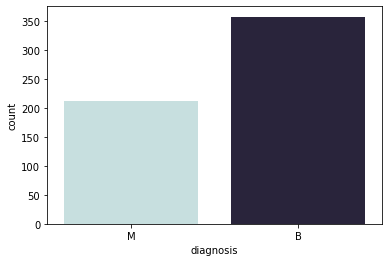

In [8]:
sns.countplot(x = 'diagnosis',data=data,palette ="ch:start=.2,rot=-.3")
plt.show()
#M - Malignant B - Benign

In [9]:
#target variable
dia_dumm = pd.get_dummies(data['diagnosis'])

In [10]:
#Add dummies with main dataframe.
data = pd.concat([data,dia_dumm],axis=1)

In [11]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,B,M
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,1


In [12]:
#Drop the unusefull columns.
data  = data.drop(['id','diagnosis','B'],axis=1)

In [13]:
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [14]:
#Selecting training data type
X = data.drop('M',axis=1)
y = data['M']

In [15]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [16]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [17]:
X_train.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.316083,0.998185,0.987094,0.164226,0.508985,0.669625,0.823662,0.130193,-0.330992,...,0.969537,0.281647,0.966220,0.941185,0.116935,0.403744,0.511501,0.736397,0.149669,-0.004484
texture_mean,0.316083,1.000000,0.322445,0.318626,-0.023107,0.241977,0.298975,0.292473,0.064376,-0.071964,...,0.349677,0.908182,0.354636,0.348051,0.093454,0.273151,0.298302,0.289088,0.098803,0.115940
perimeter_mean,0.998185,0.322445,1.000000,0.986692,0.197597,0.555299,0.705993,0.850247,0.161548,-0.286012,...,0.969520,0.288406,0.970507,0.941920,0.145972,0.442236,0.545424,0.762361,0.171204,0.035518
area_mean,0.987094,0.318626,0.986692,1.000000,0.170459,0.500276,0.679675,0.823160,0.131129,-0.302548,...,0.961717,0.276386,0.959382,0.958527,0.120212,0.380076,0.498019,0.712975,0.126243,-0.008425
smoothness_mean,0.164226,-0.023107,0.197597,0.170459,1.000000,0.643792,0.503715,0.540170,0.536098,0.569111,...,0.202340,0.039730,0.222953,0.196480,0.800811,0.454826,0.418035,0.491856,0.374436,0.487641
compactness_mean,0.508985,0.241977,0.555299,0.500276,0.643792,1.000000,0.879782,0.832933,0.583548,0.540311,...,0.537510,0.257121,0.583536,0.511644,0.577326,0.865480,0.818573,0.825494,0.501795,0.685937
concavity_mean,0.669625,0.298975,0.705993,0.679675,0.503715,0.879782,1.000000,0.914627,0.477989,0.326375,...,0.679315,0.299400,0.713638,0.668894,0.442474,0.735011,0.880653,0.856157,0.387143,0.506538
concave points_mean,0.823662,0.292473,0.850247,0.823160,0.540170,0.832933,0.914627,1.000000,0.443281,0.143624,...,0.829558,0.293345,0.852132,0.808452,0.447236,0.654748,0.739295,0.906312,0.358796,0.354534
symmetry_mean,0.130193,0.064376,0.161548,0.131129,0.536098,0.583548,0.477989,0.443281,1.000000,0.460547,...,0.161466,0.075811,0.188754,0.152443,0.410912,0.454890,0.412594,0.418307,0.688489,0.429271
fractal_dimension_mean,-0.330992,-0.071964,-0.286012,-0.302548,0.569111,0.540311,0.326375,0.143624,0.460547,1.000000,...,-0.276891,-0.037746,-0.237261,-0.254045,0.517432,0.451716,0.352917,0.168906,0.329159,0.771562


In [18]:
#Create classifier using Random Forest method and 
## apply the classier to k-hold Cross validation model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, np.ravel(y_train))
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.27 %
Standard Deviation: 2.62 %


In [19]:
#Confusion matrix of Random Forest model
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[66  1]
 [ 2 45]]


<AxesSubplot:>

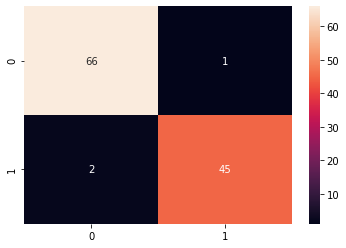

In [20]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

In [21]:
#Generate a Naive Bayes model and create Gaussian Classifier
from sklearn.naive_bayes import GaussianNB
NBmodel=GaussianNB()

#Training sets by using the model
NBmodel.fit(X_train, np.ravel(y_train))

#Predict the response for testing
names1 = []
names1.append("Naive Bayes")
scores1 = []
nb_accuracy = NBmodel.score(X_test,np.ravel(y_test))*100
scores1.append(nb_accuracy)
print("Naive Bayes Model Accuracy: ",nb_accuracy)

Naive Bayes Model Accuracy:  92.98245614035088


In [22]:
#Confusion matrix of Naive Bayes model
y_pred = NBmodel.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[63  4]
 [ 4 43]]


<AxesSubplot:>

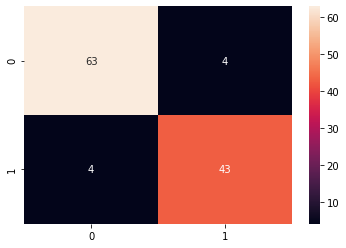

In [23]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

In [24]:
#Create classifier using Random Tree method 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
RT_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)
RT_model.fit(X_train, y_train)

#Predict the response for testing
names2 = []
names2.append("Random Tree")
scores2 = []
RT_accuracy = RT_model.score(X_test,np.ravel(y_test))*100
scores2.append(RT_accuracy)
print("Random Tree Model Accuracy: ",RT_accuracy)


Random Tree Model Accuracy:  91.22807017543859


In [25]:
#Confusion matrix of Random tree model
y_pred = RT_model.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[61  6]
 [ 4 43]]


<AxesSubplot:>

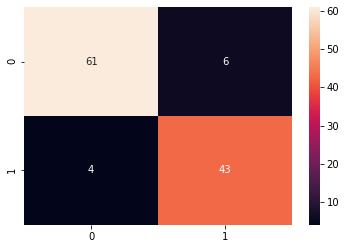

In [26]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)